In [22]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow
import matplotlib.pyplot as plt

In [23]:
x = pd.read_csv('./fashion/fashion-mnist_train.csv')
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape, y.shape)
# 60000 images 784 features


(60000, 784) (60000,)


In [24]:
np.unique(y, return_counts =True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [25]:
X_train = X.reshape((-1,28,28,1))

In [26]:
X_train.shape
Y_train = np_utils.to_categorical(y)

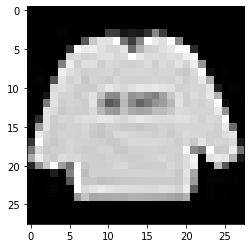

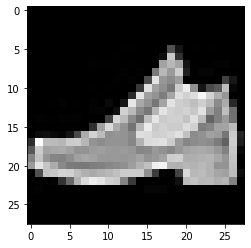

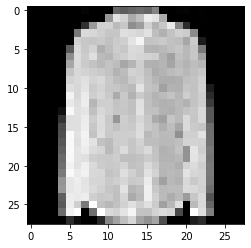

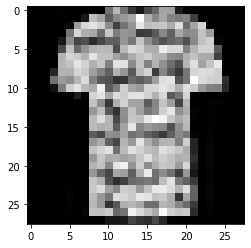

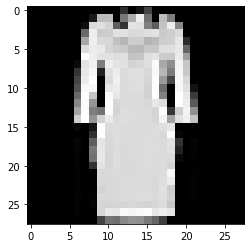

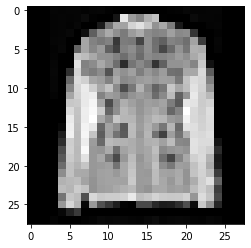

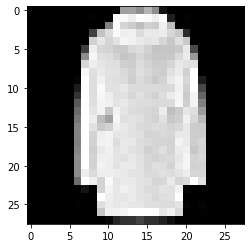

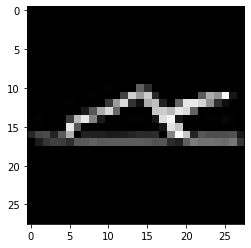

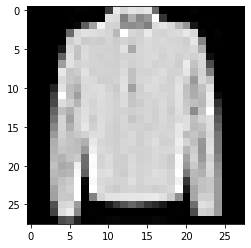

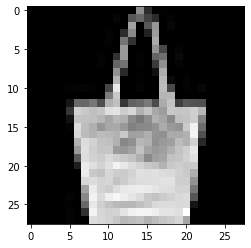

In [30]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.show()

### CNN model

In [45]:
model =  Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5), activation = 'relu'))
model.add(Convolution2D(8,(5,5), activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
#model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [50]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)              

In [53]:
hist = model.fit(X_train, Y_train, epochs = 5, shuffle = True,batch_size = 256, validation_data = 0.20)

Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 0.4339 - accuracy: 0.8435

IndexError: list index out of range